In [32]:
import pandas as pd
df = pd.read_csv('genres_v2.csv')
print(df.head())
print(df.info())
print(df.describe())


   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.83   0.814    2    -7.364     1       0.4200        0.0598   
1          0.72   0.493    8    -7.230     1       0.0794        0.4010   
2          0.85   0.893    5    -4.783     1       0.0623        0.0138   
3          0.48   0.781    0    -4.710     1       0.1030        0.0237   
4          0.80   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo            type  \
0          0.013400    0.0556   0.3890  156.985  audio_features   
1          0.000000    0.1180   0.1240  115.080  audio_features   
2          0.000004    0.3720   0.0391  218.050  audio_features   
3          0.000000    0.1140   0.1750  186.948  audio_features   
4          0.000000    0.1660   0.5910  147.988  audio_features   

                       id                                   uri  \
0  2Vc6NJ9PW9gD9q343XFRKx  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  7pgJBLVz5

In [33]:
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
song_name           6
dtype: int64

In [34]:
df_f=df.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature','song_name'],axis=1)

In [35]:
df_f

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.83   0.814    2    -7.364     1       0.4200      0.059800   
1              0.72   0.493    8    -7.230     1       0.0794      0.401000   
2              0.85   0.893    5    -4.783     1       0.0623      0.013800   
3              0.48   0.781    0    -4.710     1       0.1030      0.023700   
4              0.80   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300          0.53   0.693    4    -5.148     1       0.0304      0.031500   
42301          0.52   0.768    0    -7.922     0       0.0479      0.022500   
42302          0.36   0.821    8    -3.102     1       0.0505      0.026000   
42303          0.48   0.921    6    -4.777     0       0.0392      0.000551   
42304          0.53   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo      genre  
0              0.013400    0.0556   0.3890  156.985  Dark Trap  
1              0.000000    0.1180   0.1240  115.080  Dark Trap  
2              0.000004    0.3720   0.0391  218.050  Dark Trap  
3              0.000000    0.1140   0.1750  186.948  Dark Trap  
4              0.000000    0.1660   0.5910  147.988  Dark Trap  
...                 ...       ...      ...      ...        ...  
42300          0.000345    0.1210   0.3940  150.013  hardstyle  
42301          0.000018    0.2050   0.3830  149.928  hardstyle  
42302          0.000242    0.3850   0.1240  154.935  hardstyle  
42303          0.029600    0.0575   0.4880  150.042  hardstyle  
42304          0.000055    0.4140   0.1340  155.047  hardstyle  

[42305 rows x 12 columns]

In [36]:
df_f.genre.value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

In [37]:
df_f.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [38]:
import numpy as np
import matplotlib.pyplot as plt

num_features =df_f.select_dtypes(include=[np.number]).columns.tolist()
cat_features=df_f.select_dtypes(exclude=[np.number]).columns.tolist()

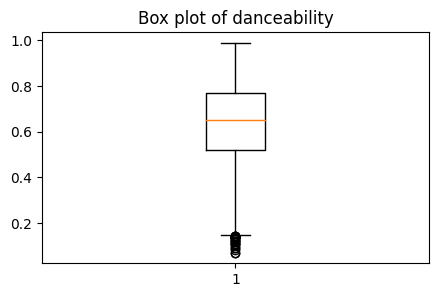

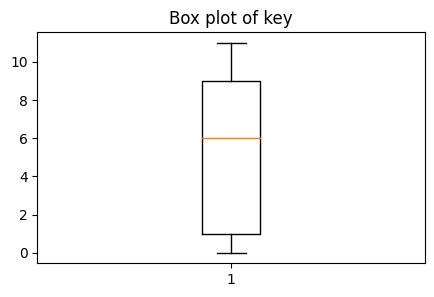

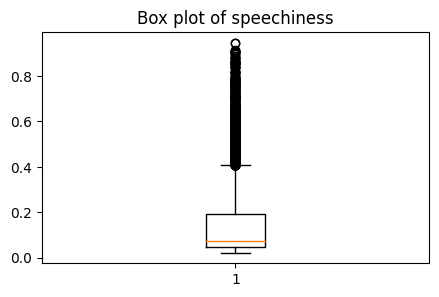

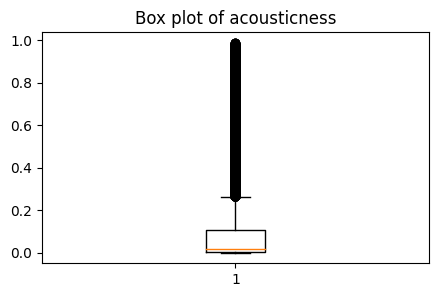

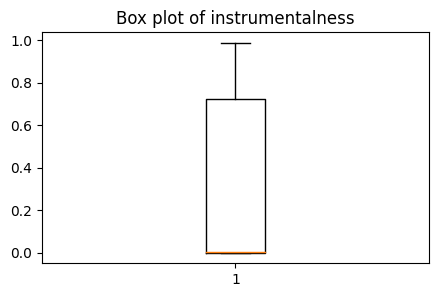

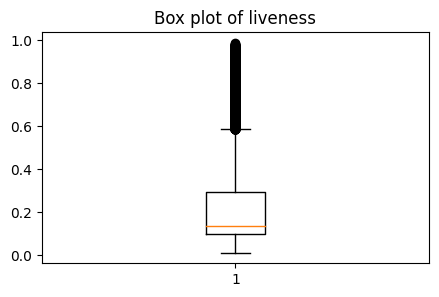

In [39]:
for feature in num_features:
    plt.figure(figsize=(5,3))
    plt.boxplot(df_f[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [40]:
for feature in num_features:
    Q1 = df_f[feature].quantile(0.25)
    Q3 = df_f[feature].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df_f[feature] >= Q1 - 1.5 * IQR) & (df_f[feature] <= Q3 + 1.5 * IQR)
    df_f = df_f[filter]

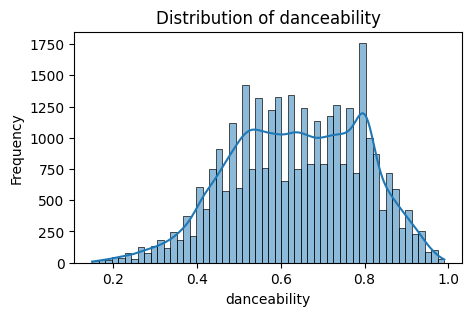

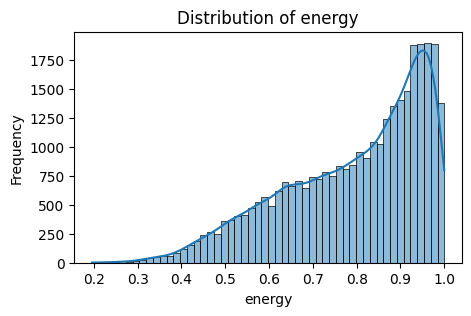

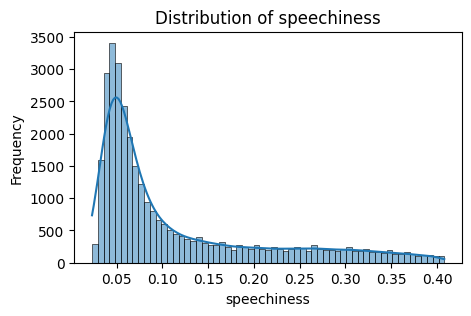

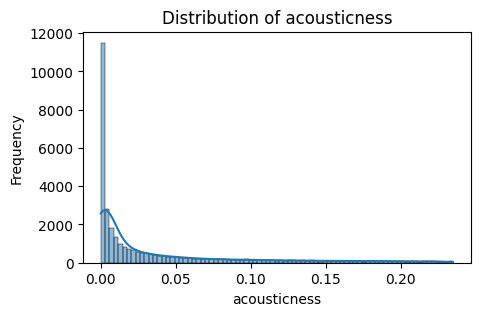

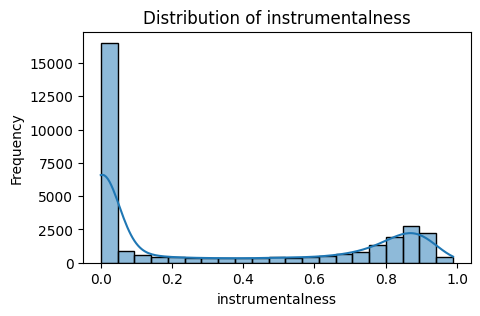

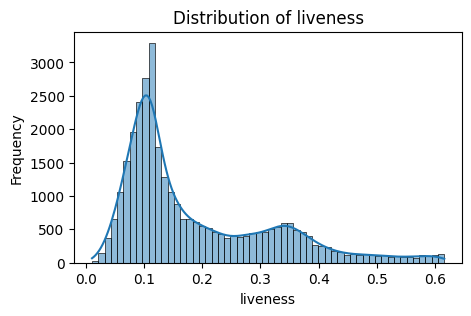

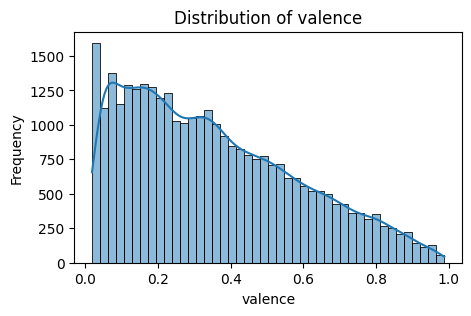

In [41]:
import seaborn as sns
for feature in num_features:
    plt.figure(figsize=(5, 3))
    sns.histplot(df_f[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

c:\Users\kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


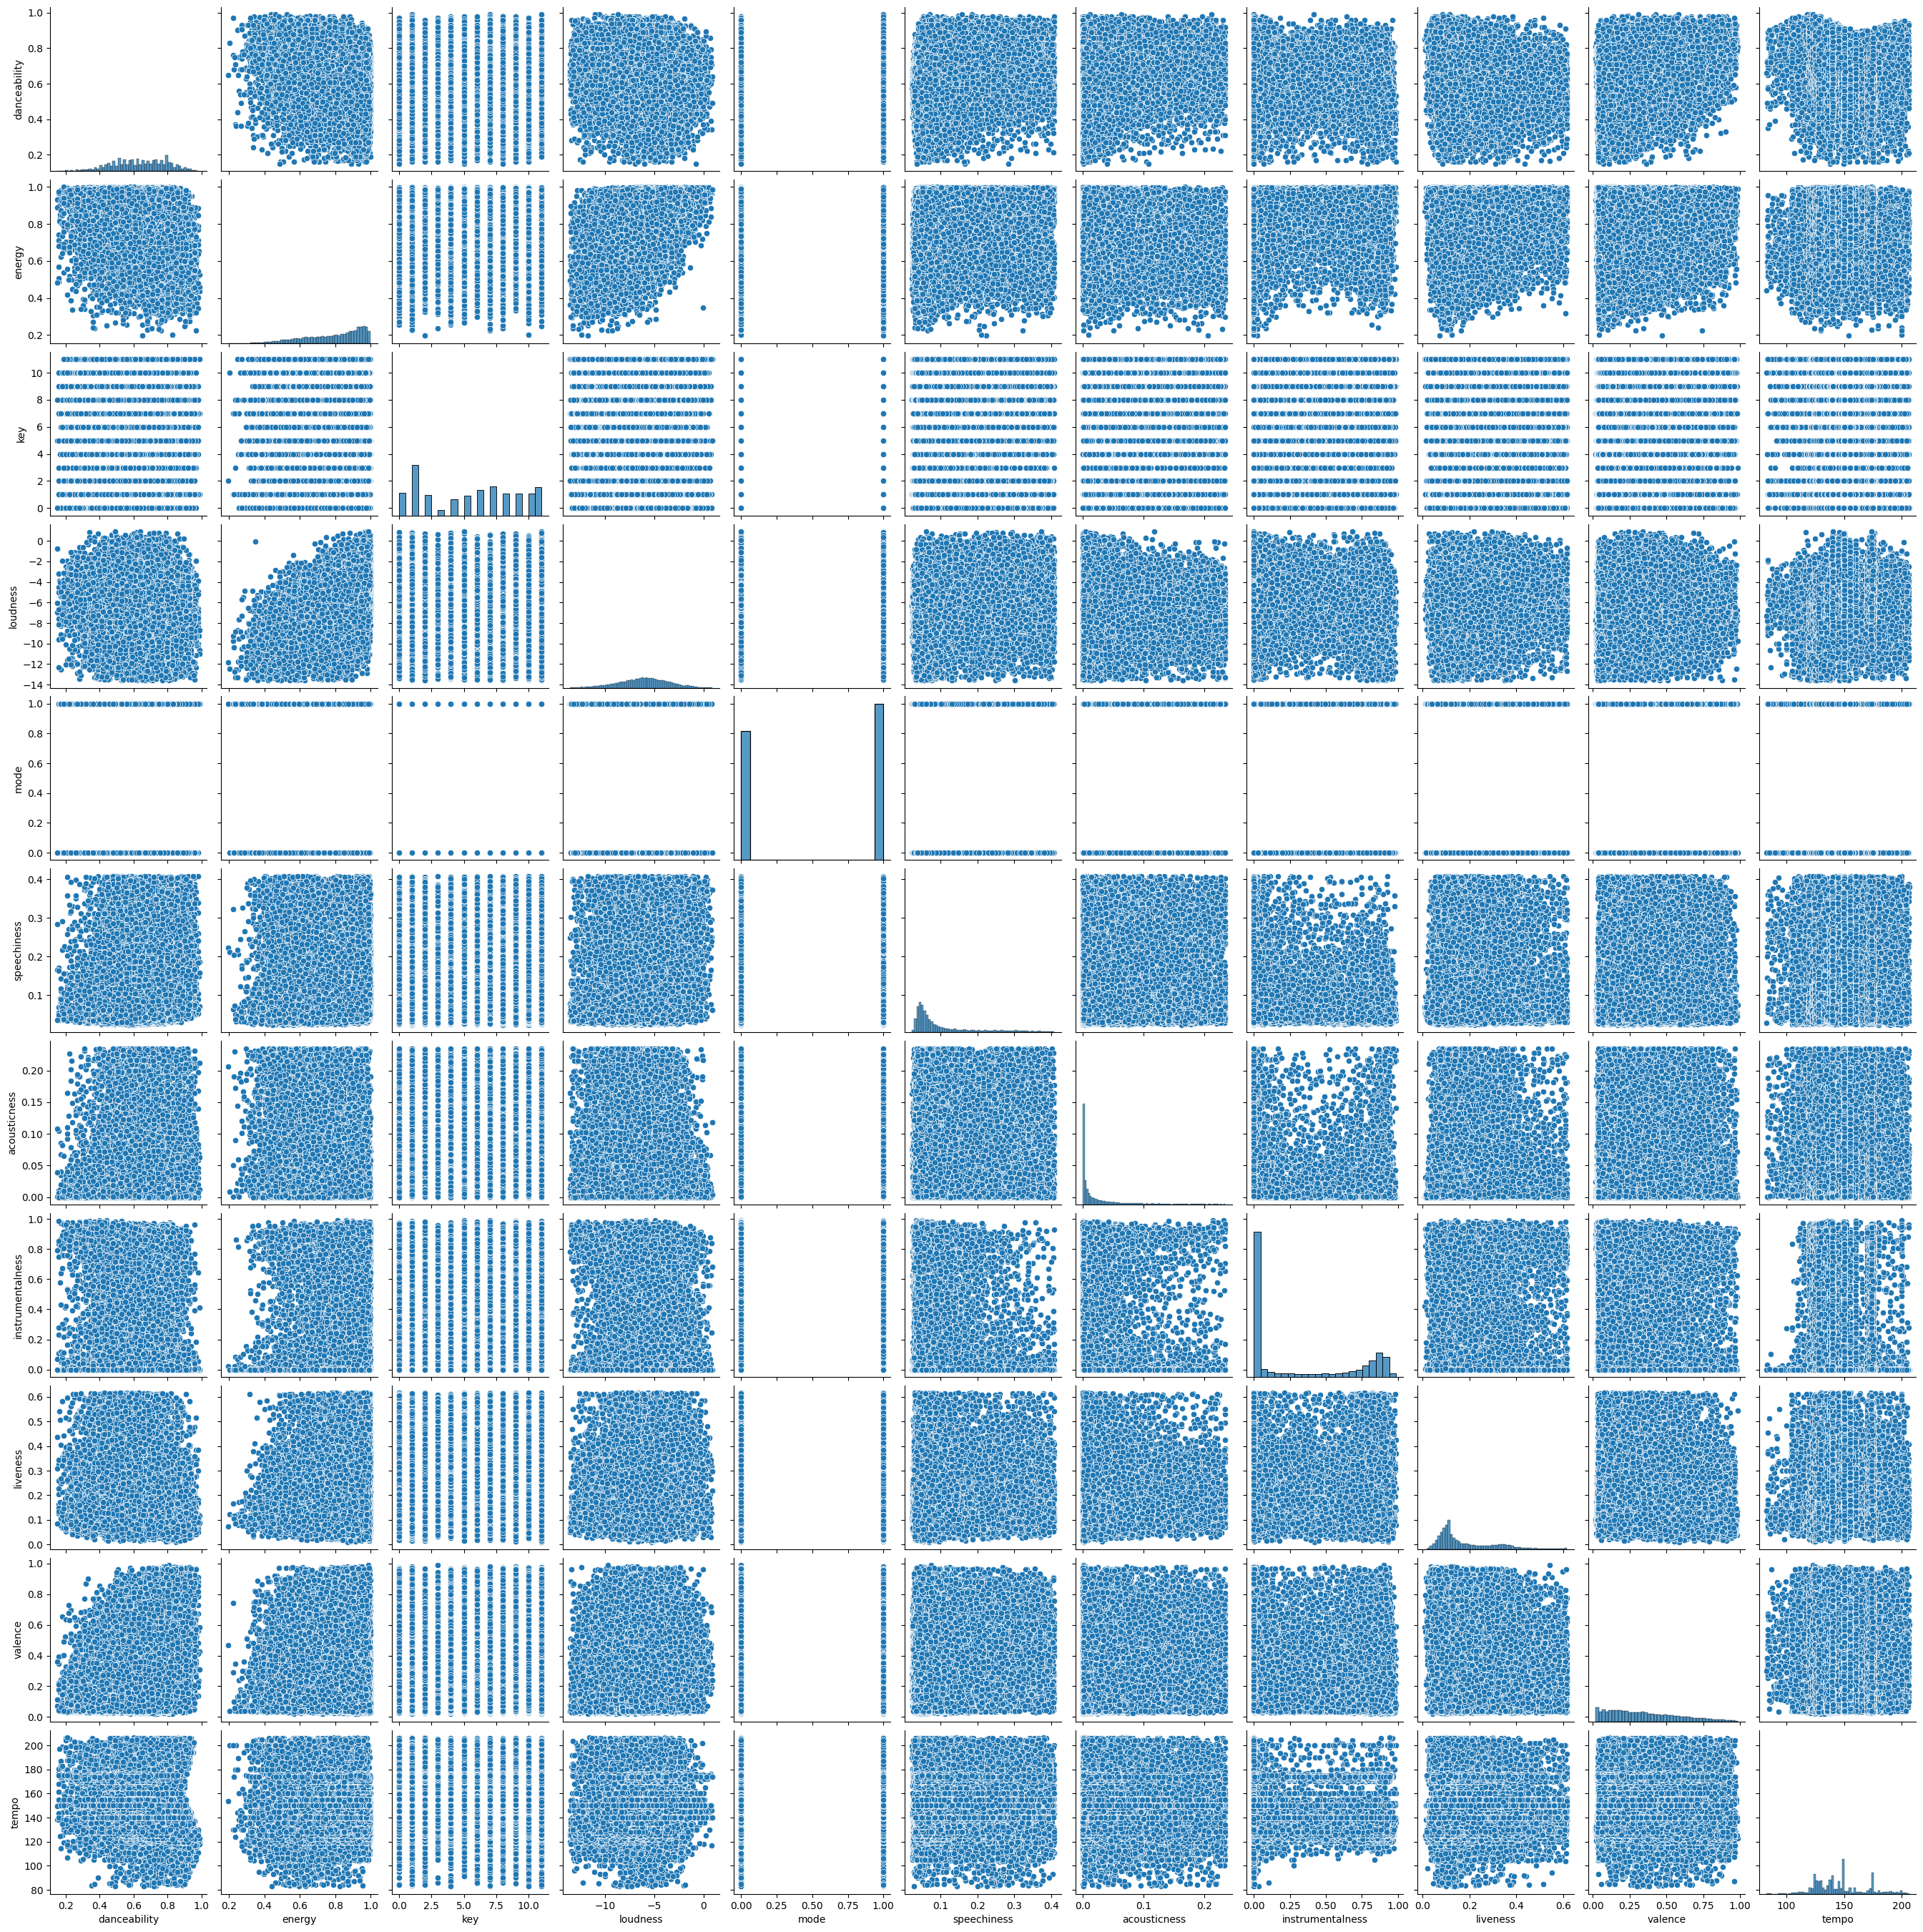

<Figure size 600x400 with 0 Axes>

In [42]:
sns.pairplot(df_f[num_features])
plt.figure(figsize=(6, 4))
plt.show()


In [43]:
plt.figure(figsize=(6, 4))
correlation_matrix = df_f[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [44]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
spotify_data_scaled = df_f.copy()
spotify_data_scaled[num_features] = scaler.fit_transform(df_f[num_features])


In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for feature in cat_features:
    le = LabelEncoder()
    df_f[feature] = le.fit_transform(df_f[feature])
    label_encoders[feature] = le

In [46]:
from sklearn.decomposition import PCA
n_components = 4 
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_f)

pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=principal_components, columns=pca_columns)


In [47]:
df_pca

PC1       PC2       PC3       PC4
0     -40.834479  6.181257 -4.742785 -0.896730
1      -1.851984  8.162910 -2.610738  0.693403
2      15.202878  7.953724  3.249378 -3.485915
3       8.028640  7.784194  3.290275 -1.900273
4     -53.621551  5.205580  6.381194  4.917150
...          ...       ...       ...       ...
32336  -3.487672 -1.307780 -1.548890 -0.699411
32337  -3.338341 -0.594521 -5.395368  2.133038
32338  -8.446840 -2.172937  2.351658 -2.660558
32339  -3.521710 -1.557566  0.462282 -1.121400
32340  -8.480313 -1.943839  3.441902  0.051301

[32341 rows x 4 columns]

In [48]:
df_pca.isnull().sum()

PC1    0
PC2    0
PC3    0
PC4    0
dtype: int64

In [49]:
# Check the explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# Visualize the PCA result in a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=df_f['genre'], palette='viridis', s=50, alpha=0.7)
plt.title('PCA Result - PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Explained variance ratio: [0.927738   0.03381987 0.02584286 0.01172888]


c:\Users\kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


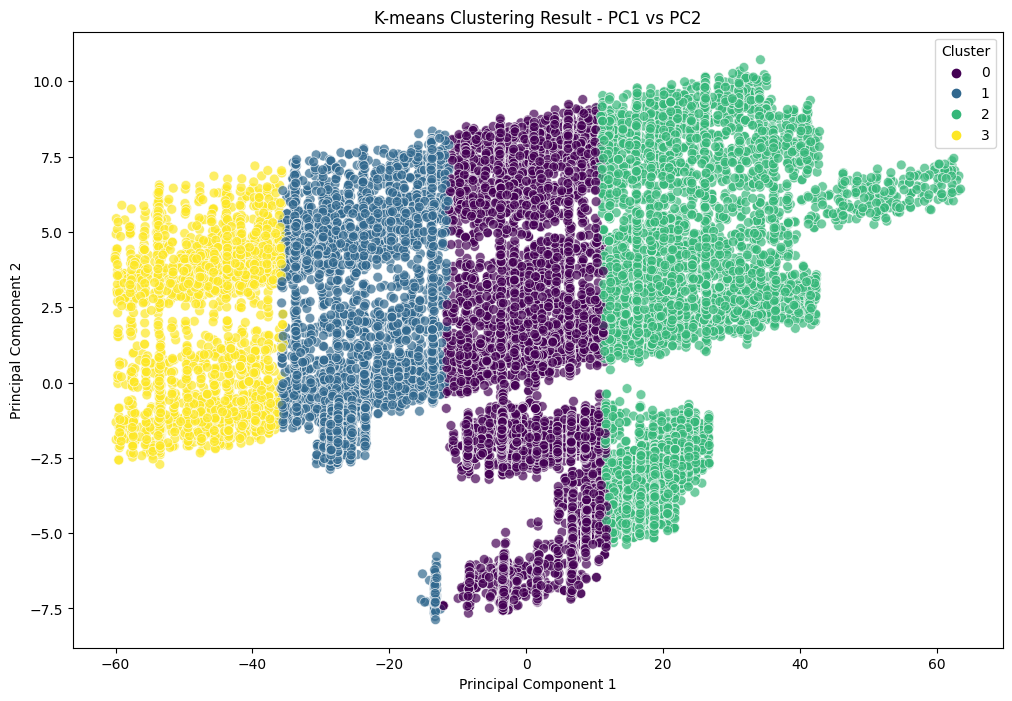

In [50]:
from sklearn.cluster import KMeans

# Apply K-means clustering to the PCA-transformed data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(principal_components)

df_pca['Cluster'] = clusters

# Visualize the clusters on the PCA plane
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering Result - PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [51]:

cluster_moods = {}
for cluster in range(4):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    avg_valence = cluster_data['PC1'].mean()
    avg_energy = cluster_data['PC2'].mean()
    
    if avg_valence > 0 and avg_energy > 0:
        cluster_moods[cluster] = 'Happy'
    elif avg_valence < 0 and avg_energy > 0:
        cluster_moods[cluster] = 'Angry'
    elif avg_valence < 0 and avg_energy < 0:
        cluster_moods[cluster] = 'Sad'
    else:
        cluster_moods[cluster] = 'Calm'

# Map moods to the DataFrame
df_pca['Mood'] = df_pca['Cluster'].map(cluster_moods)

# Check the mapping
print(df_pca[['Cluster', 'Mood']].drop_duplicates().sort_values('Cluster'))


    Cluster   Mood
1         0   Calm
31        1  Angry
2         2  Happy
0         3  Angry


In [52]:
df_pca

PC1       PC2       PC3       PC4  Cluster   Mood
0     -40.834479  6.181257 -4.742785 -0.896730        3  Angry
1      -1.851984  8.162910 -2.610738  0.693403        0   Calm
2      15.202878  7.953724  3.249378 -3.485915        2  Happy
3       8.028640  7.784194  3.290275 -1.900273        0   Calm
4     -53.621551  5.205580  6.381194  4.917150        3  Angry
...          ...       ...       ...       ...      ...    ...
32336  -3.487672 -1.307780 -1.548890 -0.699411        0   Calm
32337  -3.338341 -0.594521 -5.395368  2.133038        0   Calm
32338  -8.446840 -2.172937  2.351658 -2.660558        0   Calm
32339  -3.521710 -1.557566  0.462282 -1.121400        0   Calm
32340  -8.480313 -1.943839  3.441902  0.051301        0   Calm

[32341 rows x 6 columns]

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_songs_with_info(user_mood, user_selected_song_idx, original_dataset, num_recommendations=5):
    mood_songs = df_pca[df_pca['Mood'] == user_mood]
    
    selected_song_pca = mood_songs.iloc[user_selected_song_idx]
    
    selected_song_vector = selected_song_pca[pca_columns].values.reshape(1, -1)
    
    mood_song_vectors = mood_songs[pca_columns].values
    similarities = cosine_similarity(selected_song_vector, mood_song_vectors).flatten()
    
    recommended_indices = similarities.argsort()[-num_recommendations:][::-1]
    
    recommended_songs = original_dataset.iloc[recommended_indices]
    
    return recommended_songs[['song_name', 'uri']]


In [54]:
import nbformat
from nbconvert import PythonExporter
import os

face_detection_notebook_path = 'Final Mood Recog.ipynb'

# Load the face detection notebook
with open(face_detection_notebook_path) as f:
    face_detection_notebook = nbformat.read(f, as_version=4)

# Convert the notebook to a Python script
python_exporter = PythonExporter()
python_script, _ = python_exporter.from_notebook_node(face_detection_notebook)

# Save the script to a temporary file
temp_script_path = 'temp_face_detection_script.py'
with open(temp_script_path, 'w') as f:
    f.write(python_script)

# Run the script and capture the output
exec(open(temp_script_path).read())

# Delete the temporary script file
os.remove(temp_script_path)

# The detected emotion is now available in the `detected_emotion_output` variable
print(f"Detected Emotion: {detected_emotion_output}")


1/1 [==============================] - 0s 27ms/step
The detected emotion at the moment you pressed 'q' is: Happy
Detected Emotion: Happy


In [55]:
detected_emotion_output

'Happy'

In [56]:
user_mood = 'Calm'  # Replace with the user's selected mood ('Happy', 'Angry', 'Calm')
user_selected_song_idx = 100  # Replace with the index of a song in the mood songs dataset

recommendations = recommend_songs_with_info(user_mood, user_selected_song_idx, df)
print(recommendations)


              song_name                                   uri
100  Plague Doctor Mask  spotify:track:3lTAwJ7GAsm6mFkRejOXIm
836            Rip Peep  spotify:track:1cXDBFLjy8Ww737ird7WO9
36          WhatWasThat  spotify:track:02803el8p3mKqcJzJ3Agpp
86   Beware, the Sirens  spotify:track:1k31A67B0r2PDytoPR283x
909                SNOW  spotify:track:22RmlGGsTXB22MSvWrLqP9


In [57]:
# import pickle
# with open('recommendation_function.pkl', 'wb') as f:
#     pickle.dump(recommend_songs_with_info, f)